# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.1 -- Load data
df = pd.read_csv('./data/ForeignGifts_edu.csv')

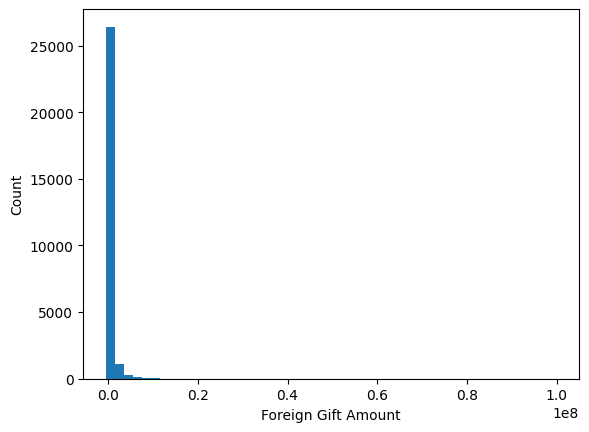

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [28]:
# 2.2 Histogram of Foreign Gift Amount
plt.hist(df["Foreign Gift Amount"], bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.show()

df["Foreign Gift Amount"].describe()
# Findings: Highly right-skewed with most gifts being small, few very large gifts

In [29]:
#2.3 gift type prop
df["Gift Type"].value_counts(normalize=True)

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


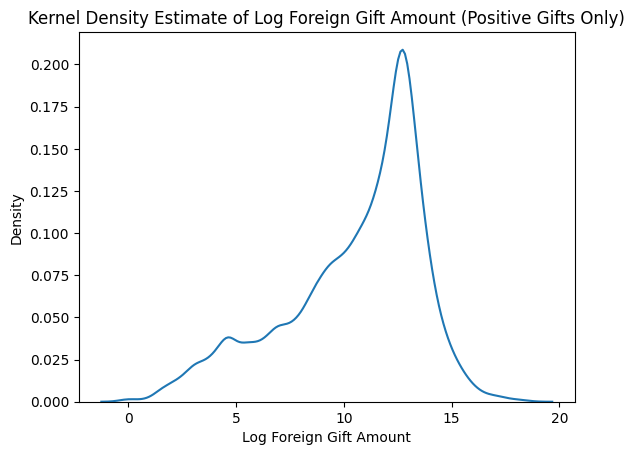

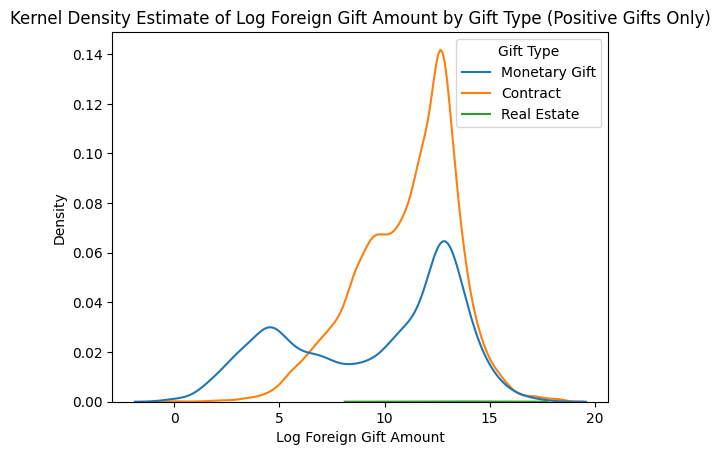


The kernel density plot of the log of positive Foreign Gift Amount shows a distribution that is more symmetric and bell-shaped compared to the original distrubtion that seemed greatly skewed.
his indicates that the logarithmic transformation is effective in normalizing the variable for better visualization and analysis.

Different gift types tend to have distinct peaks in their log-transformed amount distributions, such as 'Monetary Gift' and 'Contract' showing different central tendencies
There may also be overlap, such as 'Monetary Gift' and 'Contract' comapred to 'Real Estate,' which seems much rarer.
These plots reveal that the Gift Type has a significant influence on the distribution of Foreign Gift Amount, with each category catering to a different scale.



In [37]:
# 2.4 -- Log + kernel density
import numpy as np

# Filter for positive values before taking the log to avoid RuntimeWarnings
df_positive_gifts = df[df["Foreign Gift Amount"] > 0].copy()
df_positive_gifts["log_amount"] = np.log(df_positive_gifts["Foreign Gift Amount"])

sns.kdeplot(df_positive_gifts["log_amount"])
plt.title("Kernel Density Estimate of Log Foreign Gift Amount (Positive Gifts Only)")
plt.xlabel("Log Foreign Gift Amount")
plt.ylabel("Density")
plt.show()

sns.kdeplot(data=df_positive_gifts, x="log_amount", hue="Gift Type")
plt.title("Kernel Density Estimate of Log Foreign Gift Amount by Gift Type (Positive Gifts Only)")
plt.xlabel("Log Foreign Gift Amount")
plt.ylabel("Density")
plt.show()

print('''
The kernel density plot of the log of positive Foreign Gift Amount shows a distribution that is more symmetric and bell-shaped compared to the original distrubtion that seemed greatly skewed.
his indicates that the logarithmic transformation is effective in normalizing the variable for better visualization and analysis.

Different gift types tend to have distinct peaks in their log-transformed amount distributions, such as 'Monetary Gift' and 'Contract' showing different central tendencies
There may also be overlap, such as 'Monetary Gift' and 'Contract' comapred to 'Real Estate,' which seems much rarer.
These plots reveal that the Gift Type has a significant influence on the distribution of Foreign Gift Amount, with each category catering to a different scale.
'''
)

In [31]:

# 2.5 Top countries
top15_countries_count = df['Country of Giftor'].value_counts().head(15)
top15_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

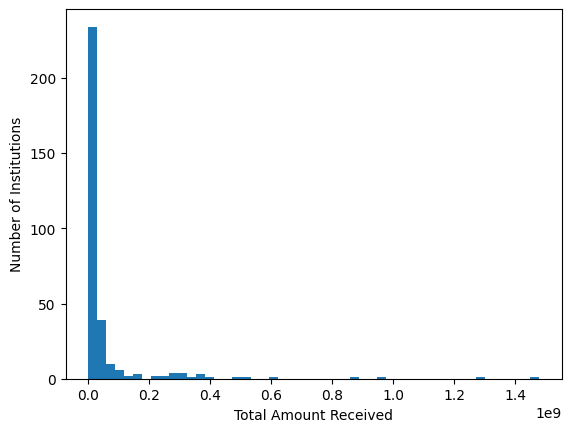

In [32]:
# 2.6 Top institutions
inst_totals = df.groupby("Institution Name")["Foreign Gift Amount"].sum()

inst_totals.sort_values(ascending=False).head(15)

plt.hist(inst_totals, bins=50)
plt.xlabel("Total Amount Received")
plt.ylabel("Number of Institutions")
plt.show()

In [36]:
# 2.7 Top giftors
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(10)
top_giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [39]:
# 3.1 loading data
airbnb = pd.read_csv("./data/airbnb_hw.csv")
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [42]:
# 3.2 dimensions
# Get the dimensions of the DataFrame (rows, columns)
dimensions = airbnb.shape
print(f"Dimensions of the data (rows, columns): {dimensions}")

# Get the number of observations (rows)
num_observations = dimensions[0]
print(f"Number of observations: {num_observations}")

# Get the variables included (column names)
variables = airbnb.columns.tolist()
print("Variables included:")
for var in variables:
    print(f"- {var}")

Dimensions of the data (rows, columns): (30478, 13)
Number of observations: 30478
Variables included:
- Host Id
- Host Since
- Name
- Neighbourhood 
- Property Type
- Review Scores Rating (bin)
- Room Type
- Zipcode
- Beds
- Number of Records
- Number Of Reviews
- Price
- Review Scores Rating


In [44]:
# 3.3 Cross tabulate `Room Type` and `Property Type`
crosstab_room_property = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
display(crosstab_room_property)

print('''
Apartment is by far the most common property type for all room type categories, followed by Entire home/apt.
The most common rental type combos are entire home/apt in Apartment and private room in Apartment.
'''
)

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0



Apartment is by far the most common property type for all room type categories, followed by Entire home/apt.
The most common rental type combos are entire home/apt in Apartment and private room in Apartment. 



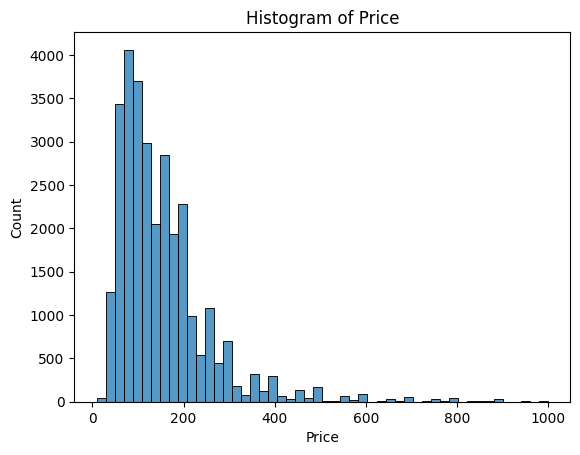

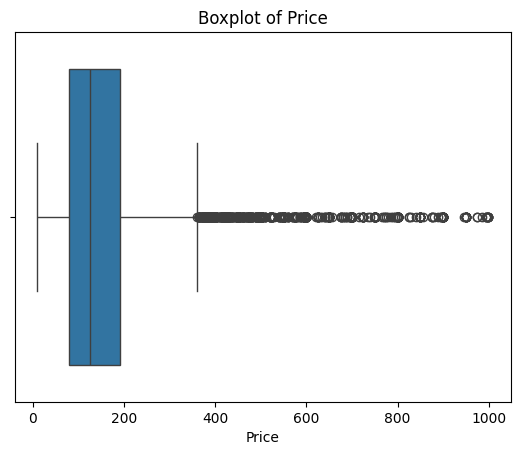

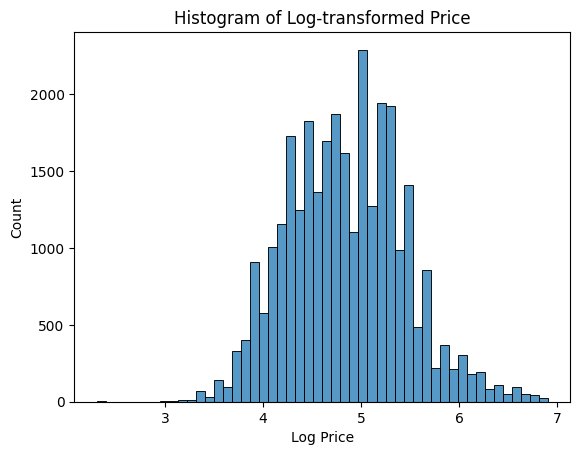

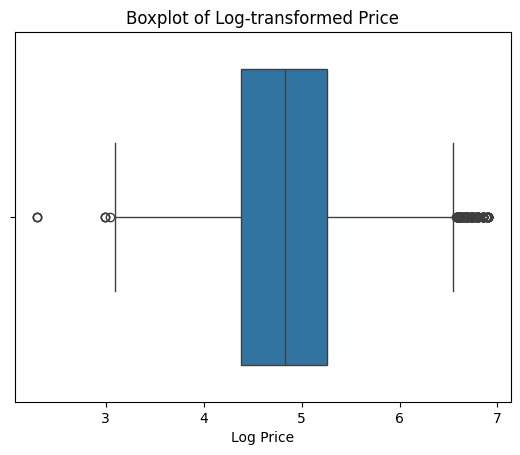

Descriptive statistics for original Price:


,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000



Descriptive statistics for log-transformed Price:


,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755



For the original price, the mean (153.36) is higher than the median (125.00), and the standard deviation (108.90) is quite large relative to the mean. This suggests a right-skewed distribution.
The box plot also shows significant outliers on the higher end of the price specturm.

For the log-transformed analysis, he mean (4.85) and median (4.83) are now very close, and the standard deviation (0.60) is much smaller. The histogram and kernel density plot for price_log appear much more symmetrical and bell-shaped, approximating a normal distribution.
he box plot for price_log shows that while some outliers may still exist, their impact on the overall distribution has been considerably reduced. The data spread is much more uniform.



In [47]:
#3.4 price distributions

# Convert 'Price' column to numeric, coercing errors to NaN
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')

# Drop rows where 'Price' is NaN for clean numeric data
airbnb_cleaned = airbnb.dropna(subset=['Price']).copy()

sns.histplot(airbnb_cleaned["Price"], bins=50)
plt.title("Histogram of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

sns.boxplot(x=airbnb_cleaned["Price"])
plt.title("Boxplot of Price")
plt.xlabel("Price")
plt.show()

# Filter for positive prices before taking the log, avoiding log(0) and such issues
airbnb_positive_prices = airbnb_cleaned[airbnb_cleaned['Price'] > 0].copy()
airbnb_positive_prices["price_log"] = np.log(airbnb_positive_prices["Price"])

sns.histplot(airbnb_positive_prices["price_log"], bins=50)
plt.title("Histogram of Log-transformed Price")
plt.xlabel("Log Price")
plt.ylabel("Count")
plt.show()

sns.boxplot(x=airbnb_positive_prices["price_log"])
plt.title("Boxplot of Log-transformed Price")
plt.xlabel("Log Price")
plt.show()

print("Descriptive statistics for original Price:")
display(airbnb_cleaned["Price"].describe())

print("\nDescriptive statistics for log-transformed Price:")
display(airbnb_positive_prices["price_log"].describe())
print('''
For the original price, the mean (153.36) is higher than the median (125.00), and the standard deviation (108.90) is quite large relative to the mean. This suggests a right-skewed distribution.
The box plot also shows significant outliers on the higher end of the price specturm.

For the log-transformed analysis, he mean (4.85) and median (4.83) are now very close, and the standard deviation (0.60) is much smaller. The histogram and kernel density plot for price_log appear much more symmetrical and bell-shaped, approximating a normal distribution.
he box plot for price_log shows that while some outliers may still exist, their impact on the overall distribution has been considerably reduced. The data spread is much more uniform.
'''
)

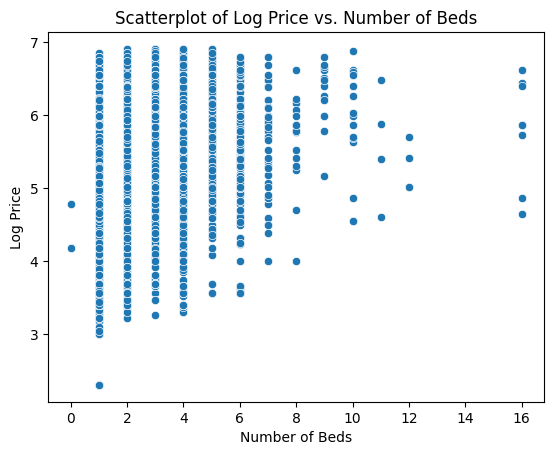


Descriptive statistics of Price grouped by Number of Beds:


,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0



The mean column generally shows an increase in average Price as the Beds count rises. For example, 1-bed properties have a mean price of ~124.76, while 9-bed properties jump to ~587.14.
he data points are not tightly clustered, indicating variability in price_log for a given number of Beds, but noticeable clusters for lower bed counts.



In [50]:
# 3.5

# Use airbnb_positive_prices for the scatterplot as 'price_log' is in this DataFrame
sns.scatterplot(x="Beds", y="price_log", data=airbnb_positive_prices)
plt.title("Scatterplot of Log Price vs. Number of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Log Price")
plt.show()

# Use airbnb_cleaned for the describe operation, as it contains the cleaned 'Price' column
print("\nDescriptive statistics of Price grouped by Number of Beds:")
display(airbnb_cleaned.groupby("Beds")["Price"].describe())


print('''
The mean column generally shows an increase in average Price as the Beds count rises. For example, 1-bed properties have a mean price of ~124.76, while 9-bed properties jump to ~587.14.
he data points are not tightly clustered, indicating variability in price_log for a given number of Beds, but noticeable clusters for lower bed counts.
'''
)

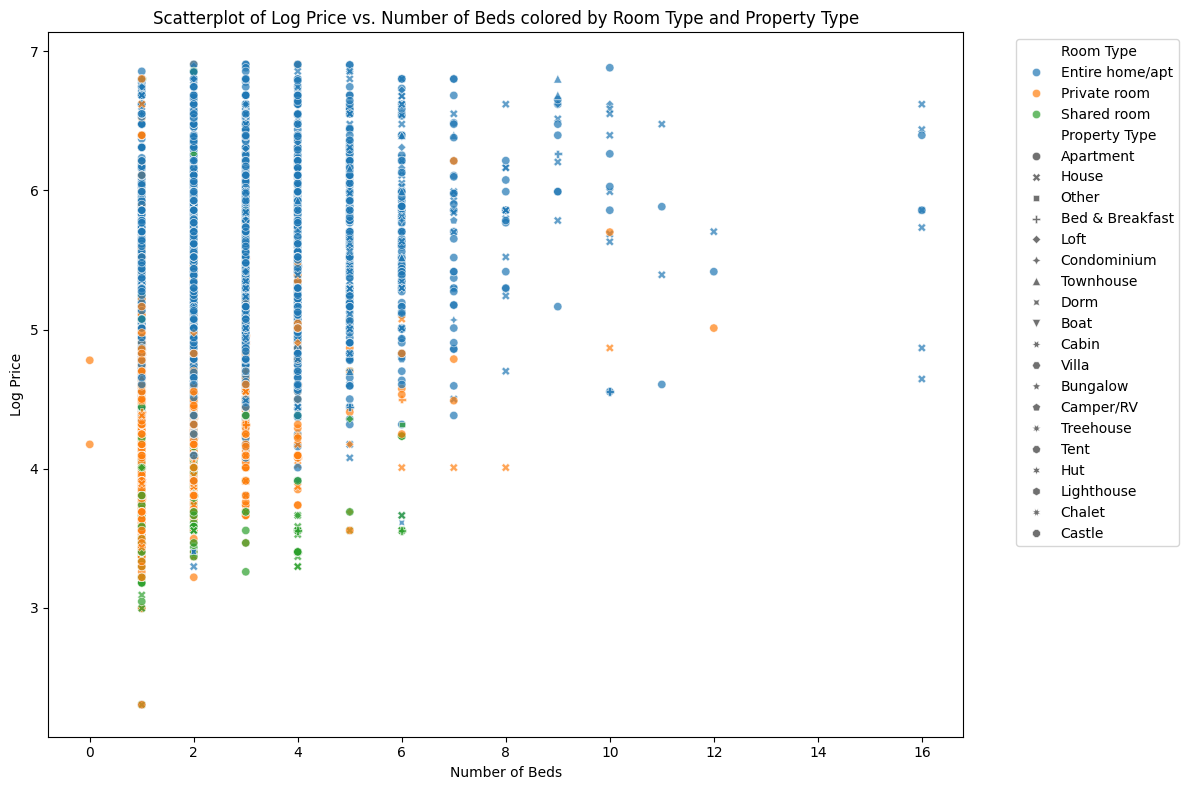


Descriptive statistics of Price grouped by Room Type and Property Type:


count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  


i saw that generally, as the number of beds goes up, the log of the price also tends to increase, but it's not a super tight relationship. When looking closer, 'Entire home/apt' rentals, especially in Apartments, Lofts, or Condominiums, were usually the most expensive and also had the biggest price differences. Also, the median price is often a better 'typical' price than the mean, especially for categories with a wide range of prices, because there can be some really high outliers messing up the average.



In [52]:
# 3.6 Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`.
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Beds", y="price_log", hue="Room Type", style="Property Type", data=airbnb_positive_prices, alpha=0.7)
plt.title("Scatterplot of Log Price vs. Number of Beds colored by Room Type and Property Type")
plt.xlabel("Number of Beds")
plt.ylabel("Log Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Compute a description of `Price` conditional on `Room Type` and `Property Type`.
print("\nDescriptive statistics of Price grouped by Room Type and Property Type:")
conditional_price_description = airbnb_cleaned.groupby(['Room Type', 'Property Type'])['Price'].describe()
display(conditional_price_description)


print('''
i saw that generally, as the number of beds goes up, the log of the price also tends to increase, but it's not a super tight relationship. When looking closer, 'Entire home/apt' rentals, especially in Apartments, Lofts, or Condominiums, were usually the most expensive and also had the biggest price differences. Also, the median price is often a better 'typical' price than the mean, especially for categories with a wide range of prices, because there can be some really high outliers messing up the average.
''')

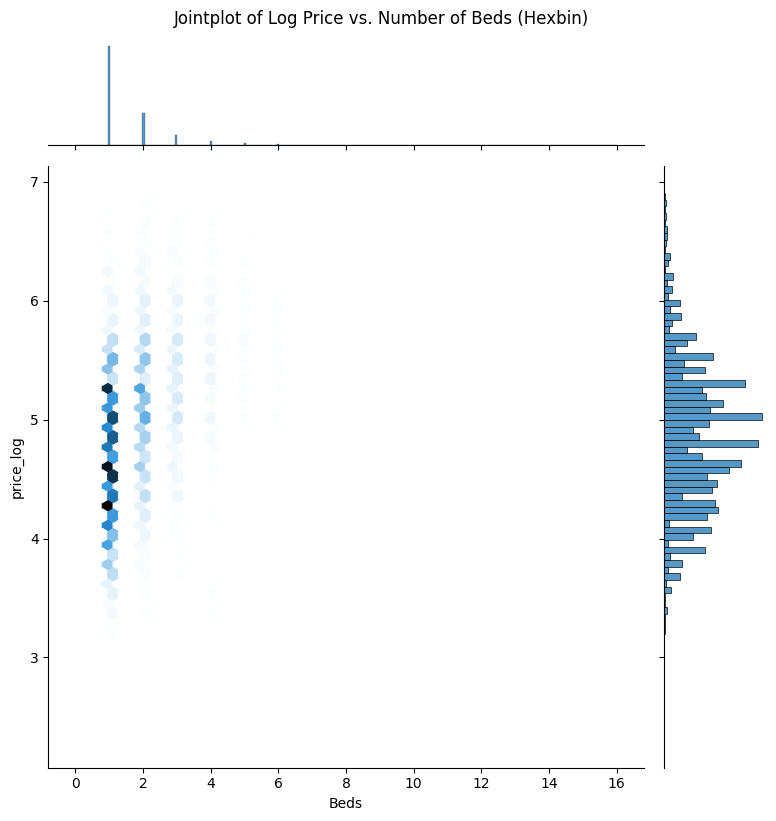


      The hexbin plot really shows where most of the Airbnb listings actually are. We can see that most places have just 1 or 2 beds, and their prices (after logging them) are typically in a mid-range. When we looked at scatterplots before, it might have seemed like there were lots of options for places with many beds or super high prices, but this hexbin plot makes it clear that those are actually pretty rare. So, while trends exist, the bulk of the market is for smaller places with moderate prices.
      


In [54]:
# 3.7 Use seaborn to make a jointplot with kind=hex

sns.jointplot(x="Beds", y="price_log", data=airbnb_positive_prices, kind='hex', height=8)
plt.suptitle("Jointplot of Log Price vs. Number of Beds (Hexbin)", y=1.02) # Adjust suptitle position
plt.show()

print(
      '''
      The hexbin plot really shows where most of the Airbnb listings actually are. We can see that most places have just 1 or 2 beds, and their prices (after logging them) are typically in a mid-range. When we looked at scatterplots before, it might have seemed like there were lots of options for places with many beds or super high prices, but this hexbin plot makes it clear that those are actually pretty rare. So, while trends exist, the bulk of the market is for smaller places with moderate prices.
      '''
      )

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [2]:
import pandas as pd

# 4.1 Load `./data/drilling_rigs.csv` and examine the data.
df_rigs = pd.read_csv('./data/drilling_rigs.csv')

print("First 5 rows of the drilling_rigs dataset:")
display(df_rigs.head())

print("\nDataFrame Info:")
df_rigs.info()

print("\nDescriptive statistics for numeric columns:")
display(df_rigs.describe(include='all'))

First 5 rows of the drilling_rigs dataset:


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas 

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
count,623,623.000000,623.000000,623,623,623,623,623,623.000000,623
unique,623,NaN,NaN,337,343,274,224,289,NaN,538
top,2024 November,NaN,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available
freq,1,NaN,NaN,175,175,216,216,216,NaN,32
mean,NaN,1246.051364,98.939005,NaN,NaN,NaN,NaN,NaN,1344.980738,NaN
std,NaN,700.532921,65.054289,NaN,NaN,NaN,NaN,NaN,744.188206,NaN
min,NaN,237.000000,6.000000,NaN,NaN,NaN,NaN,NaN,250.000000,NaN
25%,NaN,725.500000,48.500000,NaN,NaN,NaN,NaN,NaN,795.500000,NaN
50%,NaN,995.000000,95.000000,NaN,NaN,NaN,NaN,NaN,1068.000000,NaN
75%,NaN,1707.500000,125.000000,NaN,NaN,NaN,NaN,NaN,1783.500000,NaN


In [6]:
#4.2 converting month
df_rigs["time"] = pd.to_datetime(df_rigs["Month"], format="mixed")
df_rigs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                                                                                       Non-Null Count  Dtype         
---  ------                                                                                       --------------  -----         
 0   Month                                                                                        623 non-null    object        
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64         
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64         
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object        
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object 

Unique non-numeric values in 'Active Well Service Rig Count (Number of Rigs)':
[nan]


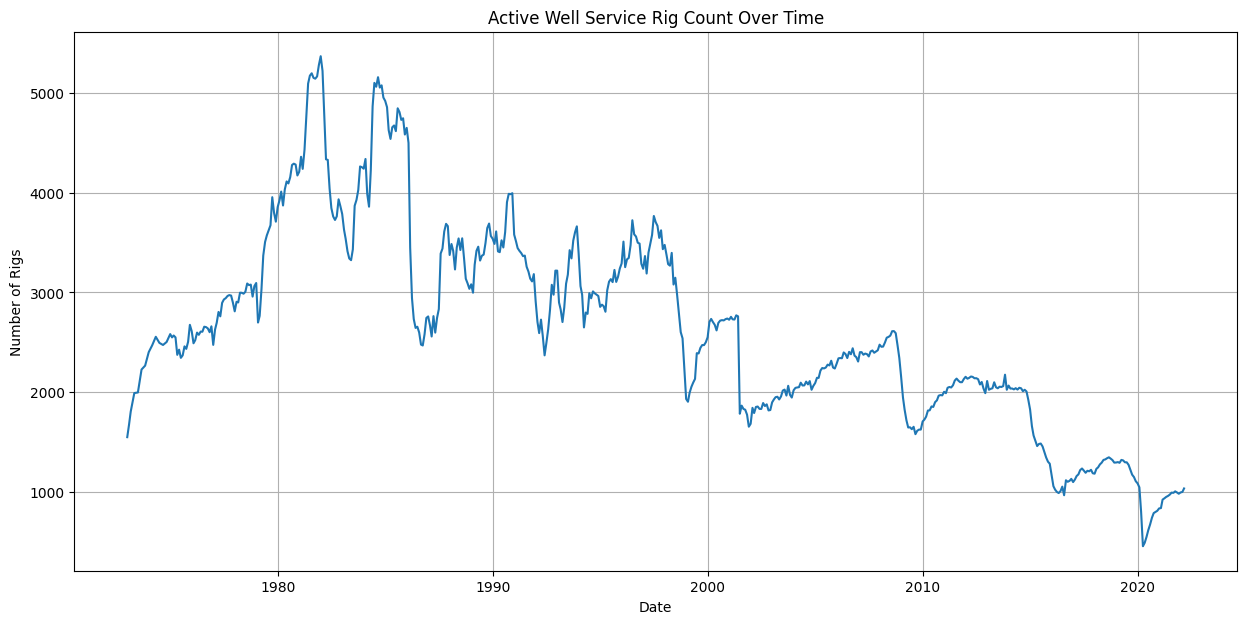


The plot shows how the number of active oil rigs in the US has changed over many years. It doesn't just go smoothly up or down; instead, it has big ups and downs. This means the oil rig business is pretty unstable, often booming for a while then crashing. These big changes probably reflect things like oil prices going up or down, or changes in the economy.



In [8]:
import matplotlib.pyplot as plt

# 4.3 Let's look at `Active Well Service Rig Count (Number of Rigs)' -aka total number of rigs over time.

# Ensuring'Active Well Service Rig Count (Number of Rigs)' column is numeric

# checking for non-numeric values in the target column
print("Unique non-numeric values in 'Active Well Service Rig Count (Number of Rigs)':")
non_numeric_values = pd.to_numeric(df_rigs['Active Well Service Rig Count (Number of Rigs)'], errors='coerce').isna()
if non_numeric_values.any():
    print(df_rigs.loc[non_numeric_values, 'Active Well Service Rig Count (Number of Rigs)'].unique())
    # Replacing non-numeric values (e.g., 'Not Available') with NaN and then convert to numeric
    df_rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df_rigs['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')
    # interpolate/drop NaN
    df_rigs_cleaned = df_rigs.dropna(subset=['Active Well Service Rig Count (Number of Rigs)']).copy()
else:
    df_rigs_cleaned = df_rigs.copy()


plt.figure(figsize=(15, 7))
plt.plot(df_rigs_cleaned['time'], df_rigs_cleaned['Active Well Service Rig Count (Number of Rigs)'])
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.show()

print('''
The plot shows how the number of active oil rigs in the US has changed over many years. It doesn't just go smoothly up or down; instead, it has big ups and downs. This means the oil rig business is pretty unstable, often booming for a while then crashing. These big changes probably reflect things like oil prices going up or down, or changes in the economy.
'''
)

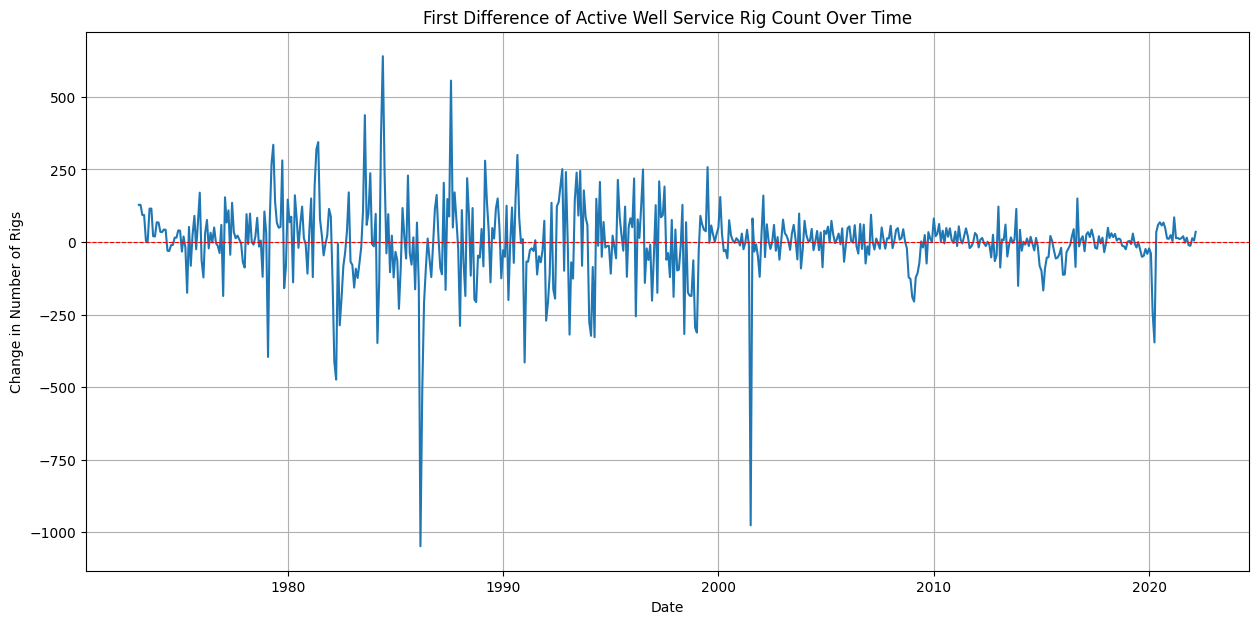


This plot zeros in on how much the number of oil rigs changes each month. These changes are often big and sporatic. This suggests that the rate at which rigs are added or removed is super volatile, showing that the industry reacts very quickly to things like oil prices/market changes.



In [10]:
# 4.4

# Calculating the first difference
df_rigs_cleaned['Rig Count First Difference'] = df_rigs_cleaned['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(15, 7))
plt.plot(df_rigs_cleaned['time'], df_rigs_cleaned['Rig Count First Difference'])
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Change in Number of Rigs')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Add a horizontal line at y=0 for reference
plt.show()

print('''
This plot zeros in on how much the number of oil rigs changes each month. These changes are often big and sporatic. This suggests that the rate at which rigs are added or removed is super volatile, showing that the industry reacts very quickly to things like oil prices/market changes.
''')

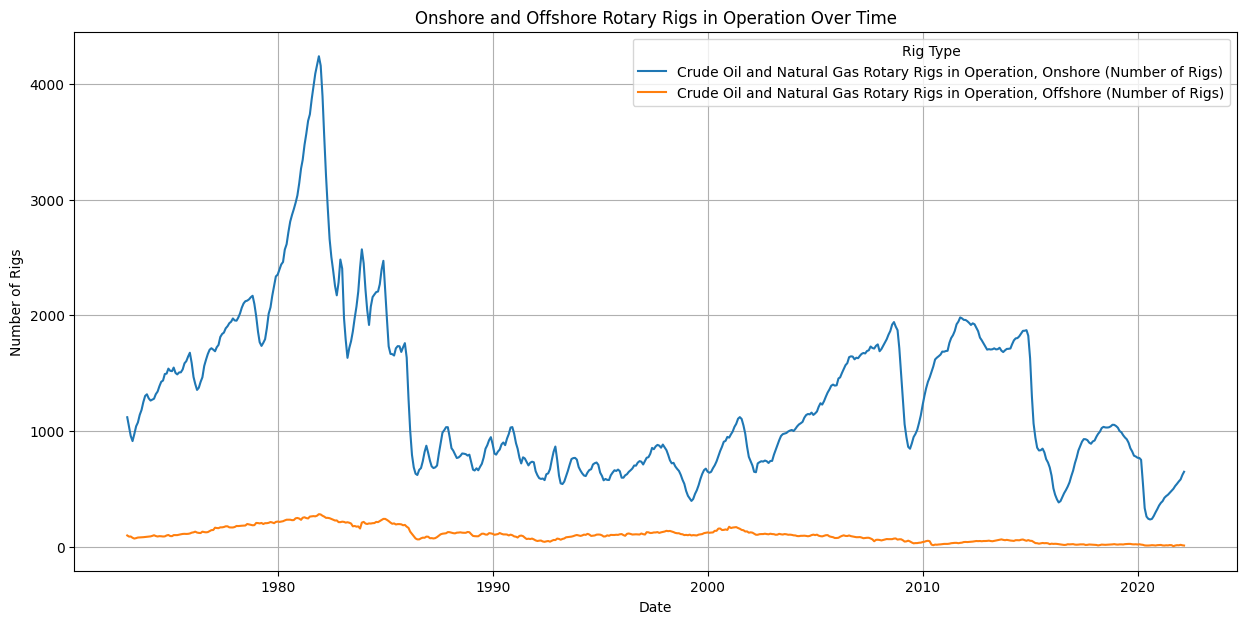


This plot helps us compare how many drilling rigs are working on land (Onshore) versus out in the ocean (Offshore). You can clearly see that there are usually way more rigs on land than offshore. They both tend to go up and down over time, but sometimes they don't move exactly the same way. It also seems like the number of land rigs changes much more dramatically than offshore rigs, possibly because it's easier and cheaper to add or remove them on land.



In [13]:
# 4.5

# Defining the columns to melt
id_vars = ['time'] # 'time' column for the x-axis
value_vars = [
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
]

# Melt the DataFrame
df_melted_rigs = df_rigs_cleaned.melt(id_vars=id_vars, value_vars=value_vars, var_name='Rig Type', value_name='Number of Rigs')

# Plot the melted series
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_melted_rigs, x='time', y='Number of Rigs', hue='Rig Type')
plt.title('Onshore and Offshore Rotary Rigs in Operation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.legend(title='Rig Type')
plt.show()

print('''
This plot helps us compare how many drilling rigs are working on land (Onshore) versus out in the ocean (Offshore). You can clearly see that there are usually way more rigs on land than offshore. They both tend to go up and down over time, but sometimes they don't move exactly the same way. It also seems like the number of land rigs changes much more dramatically than offshore rigs, possibly because it's easier and cheaper to add or remove them on land.
''')